In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df=pd.read_csv('/content/archive.zip')
df = df.rename(columns={'Annual Income (k$)': 'Annual Income(K$)'})
print(df)

     CustomerID   Genre  Age  Annual Income(K$)  Spending Score (1-100)
0             1    Male   19                 15                      39
1             2    Male   21                 15                      81
2             3  Female   20                 16                       6
3             4  Female   23                 16                      77
4             5  Female   31                 17                      40
..          ...     ...  ...                ...                     ...
195         196  Female   35                120                      79
196         197  Female   45                126                      28
197         198    Male   32                126                      74
198         199    Male   32                137                      18
199         200    Male   30                137                      83

[200 rows x 5 columns]


In [ ]:
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


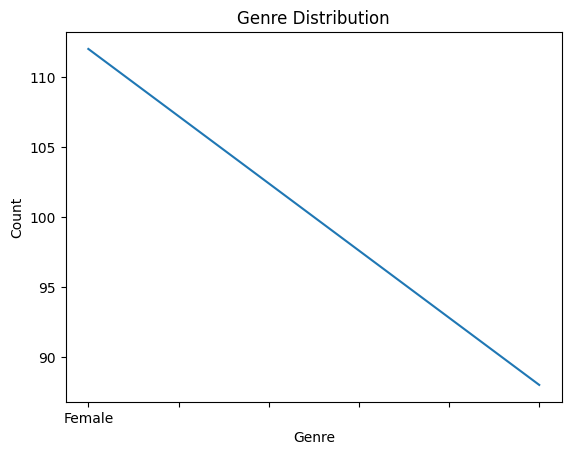

In [ ]:
#using line graph
df['Genre'].value_counts().plot(kind='line')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()

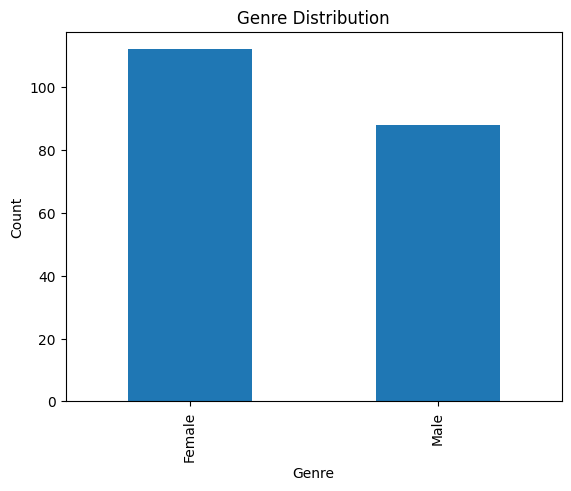

In [ ]:
#using bar graph
df['Genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()

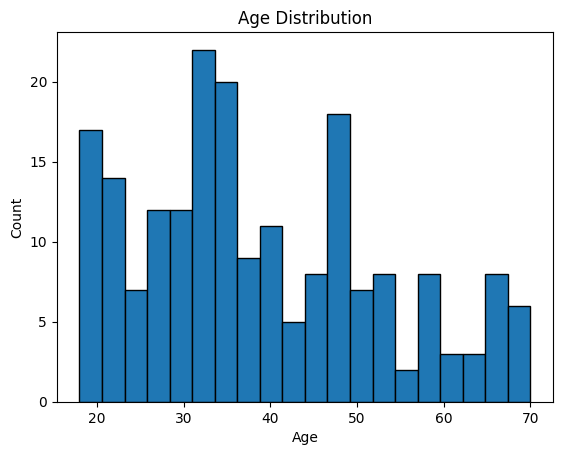

In [ ]:

plt.hist(df['Age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

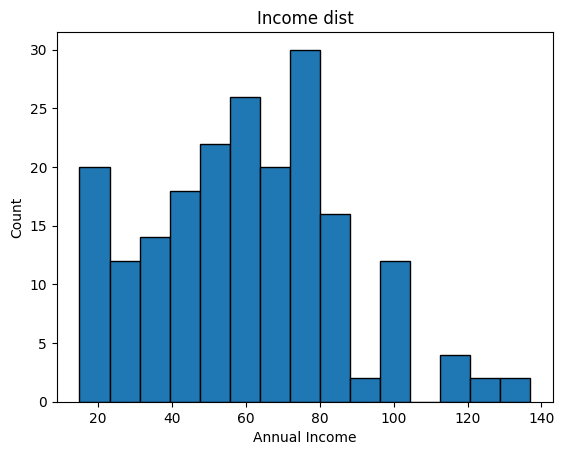

In [ ]:
plt.hist(df['Annual Income(K$)'],bins=15)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Income dist')
plt.show()

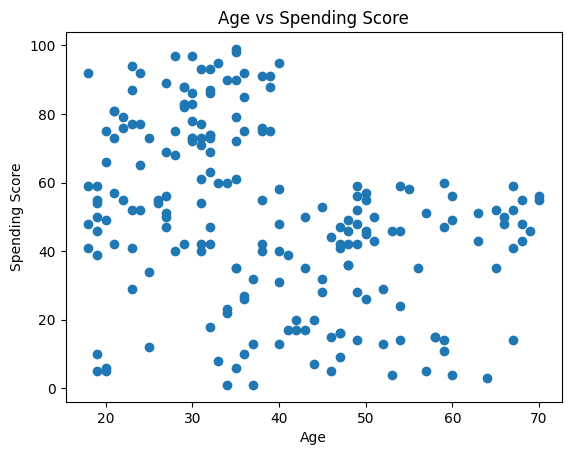

In [ ]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()

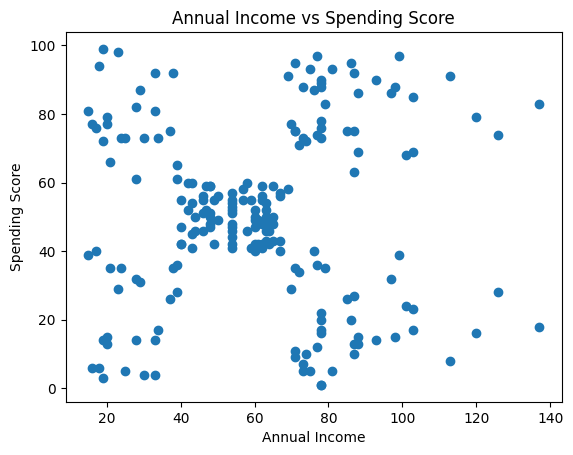

In [ ]:
plt.scatter(df['Annual Income(K$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

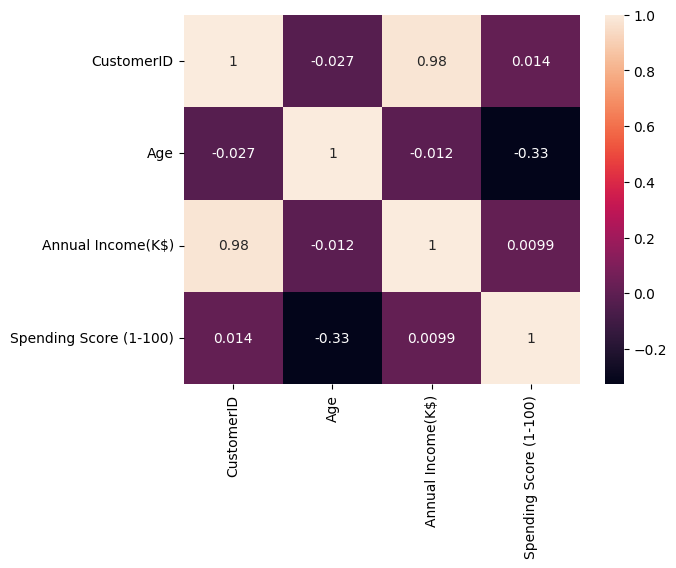

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
#Hypothesis Testing using various types-
#T-test/male and female spending score
male=df[df['Genre']=='Male']['Spending Score (1-100)']
female=df[df['Genre']=='Female']['Spending Score (1-100)']
stats.ttest_ind(male,female)

TtestResult(statistic=np.float64(-0.8190464150660334), pvalue=np.float64(0.4137446589852174), df=np.float64(198.0))

In [ ]:
#pearson correlation test/ age and spending score
stats.pearsonr(df['Age'],df['Spending Score (1-100)'])

PearsonRResult(statistic=np.float64(-0.3272268460390901), pvalue=np.float64(2.250295703565232e-06))

In [ ]:
#Chi-square test/gender and spending caategory
df['Spending_category']=pd.cut(
    df['Spending Score (1-100)'],
    bins=[0,40,80,100],
    labels=['Low','Medium','High']
)
table=pd.crosstab(df['Genre'],df['Spending_category'])
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=np.float64(0.3562229196408102), pvalue=np.float64(0.8368491432351534), dof=2, expected_freq=array([[35.28, 59.92, 16.8 ],
       [27.72, 47.08, 13.2 ]]))

In [ ]:
#ANOVA TEST/spending score across Age groups
young=df[df['Age']<=30]['Spending Score (1-100)']
middle=df[(df['Age']>=30) & (df['Age']<=50)]['Spending Score (1-100)']
old=df[df['Age']>50]['Spending Score (1-100)']
stats.f_oneway(young,middle,old)

F_onewayResult(statistic=np.float64(10.997320666430468), pvalue=np.float64(2.9125047607062118e-05))